<a href="https://colab.research.google.com/github/stevengregori92/Learn-TimeSeriesForecast/blob/main/Forecasting_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.4 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366828 sha256=a007e74ecb80e06083bd50f90a38b17a31b3a0d6073d1adc4e89e6e9a997899f
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32177 sha256=1742ecccb0c02b00906b81afe9aa035c4361eb27af91320c42a67ff349670a8b
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.6 MB/s eta 0:00:00


In [2]:
!gdown https://drive.google.com/uc?id=1H9eWWEeT7bcfveH_SXc_ibnb5m-BXC3s
!unzip /content/datats.zip

Downloading...
From: https://drive.google.com/uc?id=1H9eWWEeT7bcfveH_SXc_ibnb5m-BXC3s
To: /content/datats.zip
100% 16.8k/16.8k [00:00<00:00, 64.4MB/s]
Archive:  /content/datats.zip
  inflating: datats/airline.csv      
  inflating: datats/cheese_fred.csv  
  inflating: datats/christmas.csv    
  inflating: datats/daily_min_temp.csv  
  inflating: datats/perrin_freres_champagne.csv  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Champagne Sales

In [4]:
from jcopml.time_series import stationarity_tester
from jcopml.time_series.decomposition import stl_decomposition

<Axes: xlabel='date'>

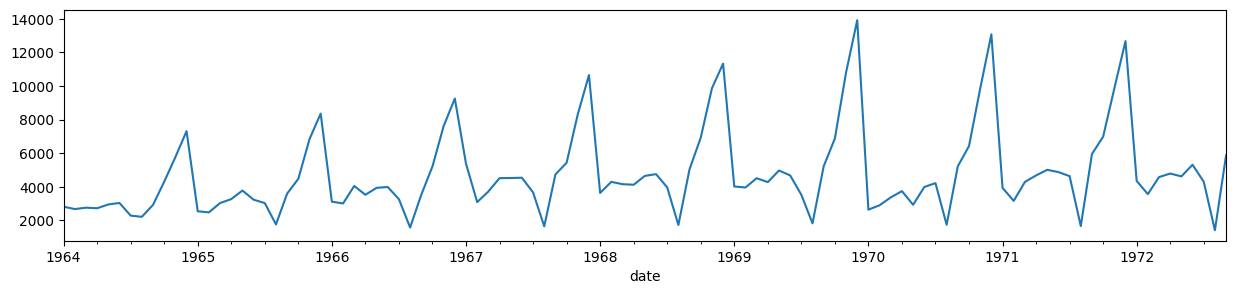

In [5]:
df = pd.read_csv('datats/perrin_freres_champagne.csv', index_col = 'date', parse_dates=['date'])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [6]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.833593,0.363916,-3.502705,-2.893158,-2.583637,False
KPSS,0.512672,0.038813,0.739,0.463,0.347,True


<Axes: xlabel='date'>

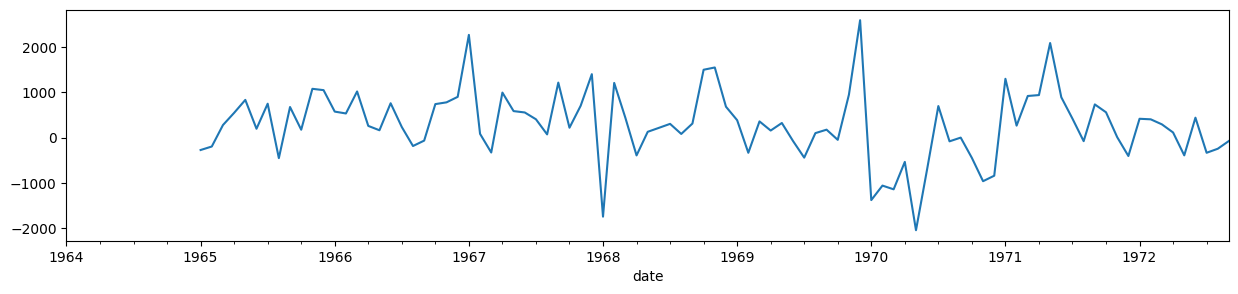

In [7]:
series.diff(12).plot(figsize=(15,3))

In [8]:
stationarity_tester(series.diff(12))

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.626619,0.0,-3.503515,-2.893508,-2.583824,True
KPSS,0.294397,0.1,0.739,0.463,0.347,False


#Airlpane

<Axes: xlabel='Date'>

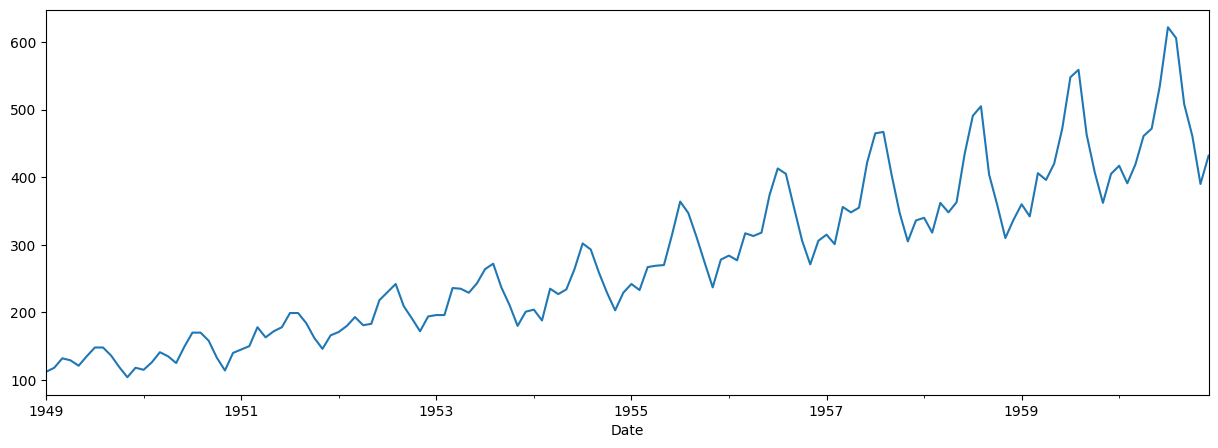

In [9]:
df = pd.read_csv('datats/airline.csv', index_col = 'Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

In [10]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,0.815369,0.99188,-3.481682,-2.884042,-2.57877,False
KPSS,1.651312,0.01,0.739,0.463,0.347,True


<Axes: xlabel='Date'>

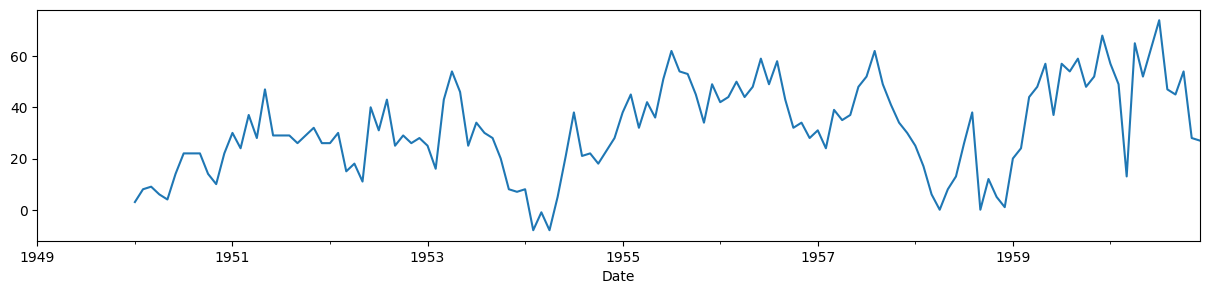

In [11]:
series.diff(12).plot(figsize=(15,3))

In [12]:
stationarity_tester(series.diff(12))

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-3.383021,0.011551,-3.481682,-2.884042,-2.57877,True
KPSS,0.533596,0.0341,0.739,0.463,0.347,True


#Recommended Way -> AIC, AICc, BIC

In [13]:
from pmdarima import auto_arima

<Axes: xlabel='Date'>

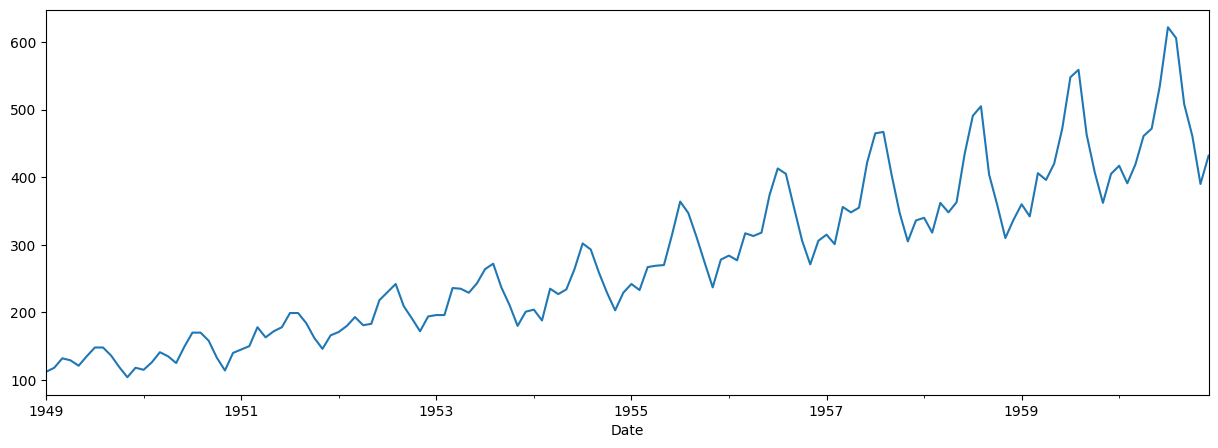

In [14]:
df = pd.read_csv('datats/airline.csv', index_col = 'Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

In [15]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion='aicc', trace=True, suppress_warning=True, random_state=42)

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AICC=807.172, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AICC=900.025, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AICC=803.805, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AICC=852.869, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AICC=1051.707, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AICC=802.465, Time=0.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AICC=803.877, Time=0.22 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AICC=805.913, Time=0.88 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AICC=802.029, Time=0.19 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AICC=803.787, Time=0.74 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AICC=803.864, Time=0.68 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AICC=inf, Time=0.79 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AICC=802.349, Time=0.19 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AICC=802.578, Time=0.14 sec
 ARIMA(1,0,1)(0,1,0)[

In [16]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Sun, 06 Aug 2023   AIC                            801.679
Time:                                    02:22:24   BIC                            812.370
Sample:                                01-01-1949   HQIC                           806.013
                                     - 11-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.92   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_forecast)

In [18]:
pred

1958-12-01    345.784678
1959-01-01    351.897367
1959-02-01    332.060462
1959-03-01    377.839945
1959-04-01    365.370249
1959-05-01    381.673658
1959-06-01    454.786102
1959-07-01    511.735141
1959-08-01    526.544854
1959-09-01    426.235680
1959-10-01    381.825079
1959-11-01    333.327940
1959-12-01    369.541648
1960-01-01    376.020376
1960-02-01    356.495768
1960-03-01    402.541696
1960-04-01    390.299325
1960-05-01    406.796682
1960-06-01    480.074599
1960-07-01    537.164815
1960-08-01    552.094977
1960-09-01    451.888569
1960-10-01    407.565644
1960-11-01    359.143309
1960-12-01    395.420838
1961-01-01    401.954017
1961-02-01    382.475865
1961-03-01    428.561429
1961-04-01    416.352873
1961-05-01    432.879081
1961-06-01    506.181613
1961-07-01    563.292831
1961-08-01    578.240910
1961-09-01    478.049789
1961-10-01    433.739906
1961-11-01    385.328699
1961-12-01    421.615722
1962-01-01    428.157001
1962-02-01    408.685759
1962-03-01    454.777219


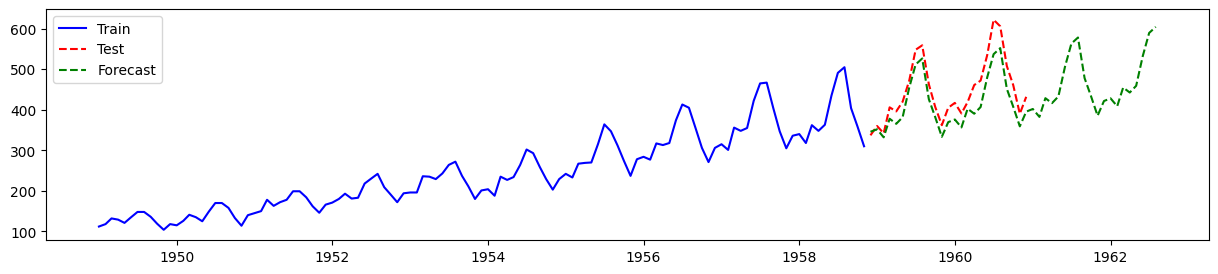

In [19]:
plt.figure(figsize=(15,3))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r--', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()